Cell 1: Load processed 

In [6]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
PROC_PATH = PROJECT_ROOT / "data" / "processed" / "churn_processed.csv"

df = pd.read_csv(PROC_PATH)
df.head()


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Cell 2: Quick churn rate by categorical

In [8]:
import pandas as pd
from pathlib import Path

# Load processed
PROJECT_ROOT = Path.cwd().parent
PROC_PATH = PROJECT_ROOT / "data" / "processed" / "churn_processed.csv"

df = pd.read_csv(PROC_PATH)

# ระบุ target
target_col = "Churn" if "Churn" in df.columns else df.columns[-1]
print("target_col:", target_col)

# แปลง Yes/No -> 0/1 (ถ้ายังเป็นข้อความ)
if df[target_col].dtype == "object":
    df[target_col] = df[target_col].str.strip().map({"Yes": 1, "No": 0})

# กันกรณีเป็น "yes/no" ตัวเล็ก
if df[target_col].dtype == "object":
    df[target_col] = df[target_col].str.lower().str.strip().map({"yes": 1, "no": 0})

# ถ้ายังไม่เป็นตัวเลข ให้ฟ้องทันที
if df[target_col].isna().any():
    bad_vals = df.loc[df[target_col].isna(), "Churn"].unique() if "Churn" in df.columns else []
    raise ValueError(f"ยังแปลง Churn ไม่ได้ เจอค่าแปลก ๆ: {bad_vals}")

df[target_col] = df[target_col].astype(int)

print(df[target_col].value_counts())
df.head()


target_col: Churn
Churn
0    5174
1    1869
Name: count, dtype: int64


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


Cell 3: Simple hist for numeric

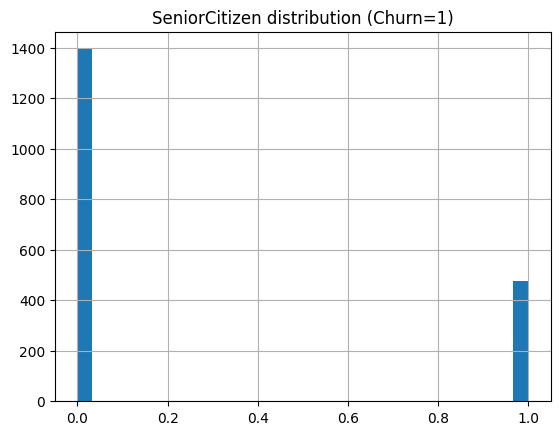

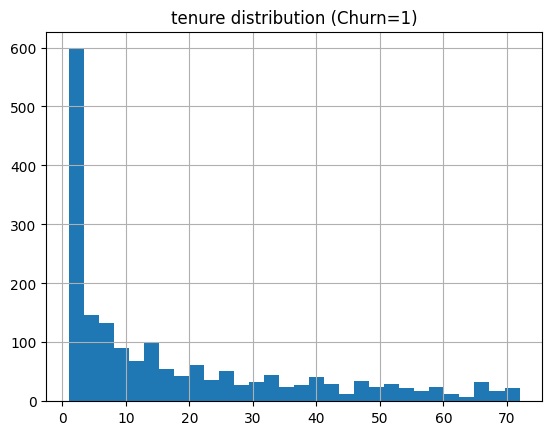

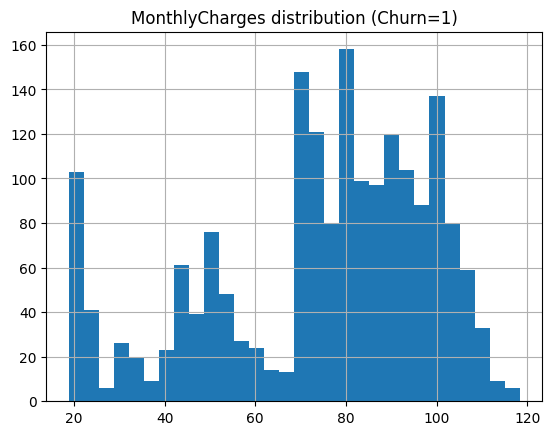

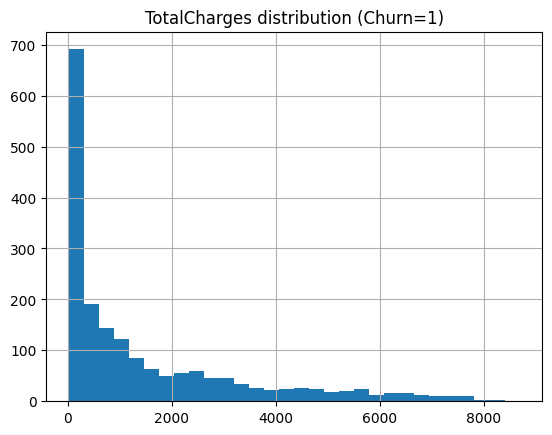

In [9]:
import matplotlib.pyplot as plt

num_cols = df.select_dtypes(include=["number"]).columns.tolist()
num_cols = [c for c in num_cols if c != target_col]

for c in num_cols[:6]:
    df[df[target_col]==1][c].hist(bins=30)
    plt.title(f"{c} distribution (Churn=1)")
    plt.show()
